In [29]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
%%javascript
// avoids scrollboxes for plots
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [4]:
def plot_decision_surface(model, marker=".", N=400):
    x, y = np.linspace(-1, 1, N), np.linspace(-1, 1, N)
    points = np.array(np.meshgrid(x, y)).T.reshape(-1, 2)
    classes = np.array(model(points)) 
    plt.figure(figsize=(6, 6))
    plt.plot(points[classes][:, 0], points[classes][:, 1], "g" + marker, markersize=1, alpha=.05);
    plt.plot(points[~classes][:, 0], points[~classes][:, 1], "r" + marker, markersize=1, alpha=.05);


def plot_classifier_surface(clf, points=None, marker="x", N=200):
    if points is None:
        x, y = np.linspace(-1, 1, N), np.linspace(-1, 1, N)
        points = np.array(np.meshgrid(x, y)).T.reshape(-1, 2)
    
    classes = np.array(clf.predict(points)).astype(float) 
    levels = sorted(set(classes))
    print("levels in contour plot:", levels)
    
    plt.contour(points[:, 0].reshape(N, N), points[:, 1].reshape(N, N), classes.reshape(N, N), levels=levels, alpha=.5)

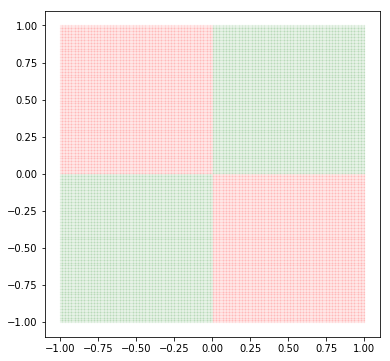

In [31]:
# some functions for creating labels

def np_array_adapter(function):
    def wrapped(p):
        assert p.shape[1] == 2, "matrix must have two columns"
        x, y = p[:, 0], p[:, 1]
        return function(x, y)
    return wrapped

@np_array_adapter
def xor(x, y):
    return x * y > 0

@np_array_adapter
def circle(x, y):
    return x ** 2 +  y ** 2 > .7

@np_array_adapter
def ellipsis(x, y):
    return 3 * x ** 2 +  .7 * y ** 2 + 2 * x * y < .3

@np_array_adapter
def two_circles(x, y):
    return np.logical_or((x-.3) ** 2 +  (y - .3) ** 2 <.15, (x+.4) ** 2 +  (y + .4) ** 2 < .25)

plot_decision_surface(xor)

(40000, 2)
196 out of 200 classified correctly


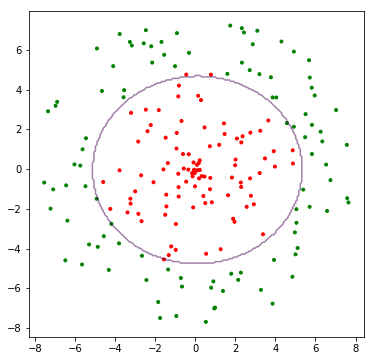

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC, SVC
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def plot_classifier_surface(clf, features, marker="x", N=200):
    features = np.array(features)
    xmin, ymin = features.min(axis=0)
    xmax, ymax = features.max(axis=0)
    
    x = np.linspace(xmin, xmax, N)
    y = np.linspace(ymin, ymax, N) 
    
    points = np.array(np.meshgrid(x, y)).T.reshape(-1, 2)
    print(points.shape)
    
    classes = np.array(clf.predict(points)).astype(float) 
    levels = sorted(set(classes))
    levels = [0, .5, 1]
    # print("levels in contour plot:", levels)
    
    plt.contour(points[:, 0].reshape(N, N), 
                points[:, 1].reshape(N, N), 
                classes.reshape(N, N), 
                levels=levels, 
                alpha=.5)


df = pd.read_csv("2d_points.csv")
# df = pd.read_csv("xor.csv")

features = df.iloc[:, :-1]
labels = df.iloc[:, -1]

plt.figure(figsize=(6, 6))

colors = ["rg"[i] for i in labels]
plt.scatter(features.iloc[:, 0], features.iloc[:, 1], color=colors, marker='.')


# Pipeline(...) below creates a processing pipeline, which 
# - first adds extra features x * y, x * x and y * y
# - then uses the specified classifier
#
# more about pipelines later...

clf = Pipeline(steps=[("feature_engineering", PolynomialFeatures(degree=2, include_bias=False)), 
                      ("classifier", LinearSVC())])

# clf = SVC(gamma=.1)
# clf = DecisionTreeClassifier(max_depth=7)

clf.fit(features, labels)

plot_classifier_surface(clf, features) 

predicted = clf.predict(features)
print(sum(predicted == labels), "out of", len(labels), "classified correctly")
plt.show()

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

accuracy is 0.985
crossval mean score is 0.8249921862791062
levels in contour plot: [0.0, 1.0]


/Users/uweschmitt/Projects/machinelearning-introduction-workshop/venv3.6/lib/python3.6/site-packages/matplotlib/contour.py:1230: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


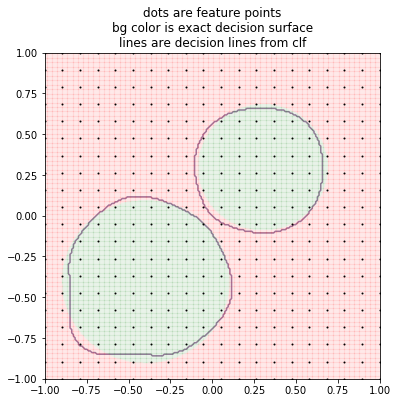

In [54]:
clf = LogisticRegression()
clf = SVC(C=10, gamma=10) 
# clf = RandomForestClassifier()
# clf = DecisionTreeClassifier(max_depth=19)
# clf = GradientBoostingClassifier()



N = 20
x, y = np.linspace(-1, 1, N), np.linspace(-1, 1, N)
points = np.array(np.meshgrid(x, y)).T.reshape(-1, 2)
points.shape

model = two_circles
classes = np.array(model(points))
    
clf.fit(points, classes)


print("accuracy is", accuracy_score(classes, clf.predict(points)))
scores = cross_val_score(clf, points, classes, cv=5)
print("crossval mean score is", np.mean(scores))

plot_decision_surface(model)

plt.plot(points[:, 0], points[:, 1], "k.", markersize=2)
plt.title("dots are feature points\nbg color is exact decision surface\nlines are decision lines from clf")

plot_classifier_surface(clf)